In [4]:
!rm /App/output/aggregated_40.csv
!rm -rf /App/output/train_40
!mkdir /App/output/train_40

rm: cannot remove '/App/output/aggregated_40.csv': No such file or directory


## Initial test

### RTT scheduler

In [5]:
%%bash

cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 40 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

4618.75
Serving new connection: d651bd4380c53b5b, version 512 from 10.0.0.1:35734
GET 10.0.0.20:6121/test3
Responding with 200
Info for stream 5 of d651bd4380c53b5b
Path 3: sent 1274 retrans 0 lost 0; rcv 606 rtt 191.381ms
Congestion Window: 94900
Path 1: sent 371 retrans 0 lost 0; rcv 178 rtt 609.799ms
Congestion Window: 87600
Path 0: sent 7 retrans 1 lost 0; rcv 6 rtt 614.655ms
Congestion Window: 46720


*** Error setting resource limits. Mininet's performance may be affected.


### Trained DQNAgent

In [6]:
%%bash

cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 40 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

5163.00
Serving new connection: b8a1d208378d8bf4, version 512 from 10.0.0.1:60672
GET 10.0.0.20:6121/test3
Responding with 200
Info for stream 5 of b8a1d208378d8bf4
Path 1: sent 720 retrans 4 lost 0; rcv 313 rtt 451.743ms
Congestion Window: 205860
Path 0: sent 350 retrans 1 lost 0; rcv 144 rtt 451.743ms
Congestion Window: 86140
Path 3: sent 589 retrans 0 lost 0; rcv 256 rtt 359.409ms
Congestion Window: 118260


*** Error setting resource limits. Mininet's performance may be affected.


## Comparison

In [7]:
%%bash
rm /App/logs/client.logs
echo 24050 > /App/output/train_40/validate_24050.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 40 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_40/validate_24050.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
( ip link del s1-eth3 ) 2> /dev/null
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup co

In [8]:
%%bash
rm /App/logs/client.logs
echo 0 > /App/output/train_40/validate_rtt.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 40  --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_40/validate_rtt.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup complete.
*** Error setting resource li

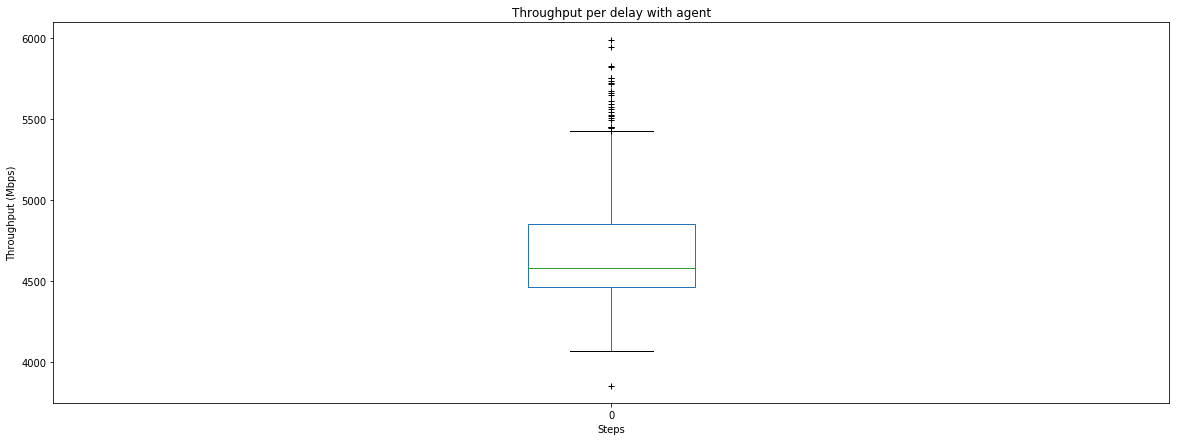

In [9]:
import pandas


rtt_sch = pandas.read_csv("/App/output/train_40/validate_rtt.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)


(2*8 * 1024 * 1024 / rtt_sch).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

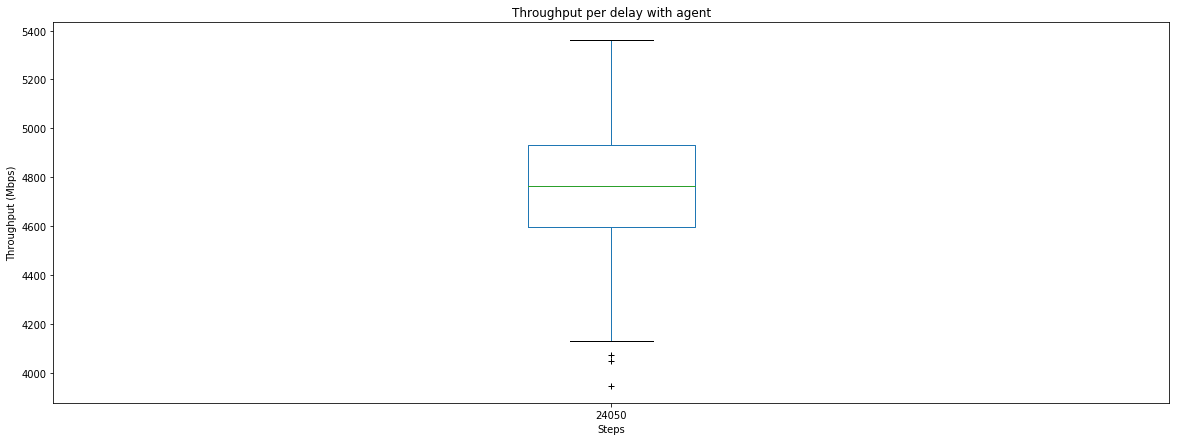

In [10]:
rtt_24050= pandas.read_csv("/App/output/train_40/validate_24050.csv")
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)
(2*8 * 1024 * 1024 / rtt_24050).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

In [11]:
(2*8 * 1024 * 1024 / rtt_24050).median()

24050    4762.806724
dtype: float64

In [12]:
(2*8 * 1024 * 1024 / rtt_24050).mean()

24050    4753.878191
dtype: float64

In [13]:
(2*8 * 1024 * 1024 / rtt_sch).median()

0    4582.739339
dtype: float64

In [14]:
(2*8 * 1024 * 1024 / rtt_sch).mean()

0    4737.01942
dtype: float64